In [128]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [129]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#EDA

In [130]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [131]:
df.shape

(918, 12)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [133]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [134]:
df.duplicated().sum()

np.int64(0)

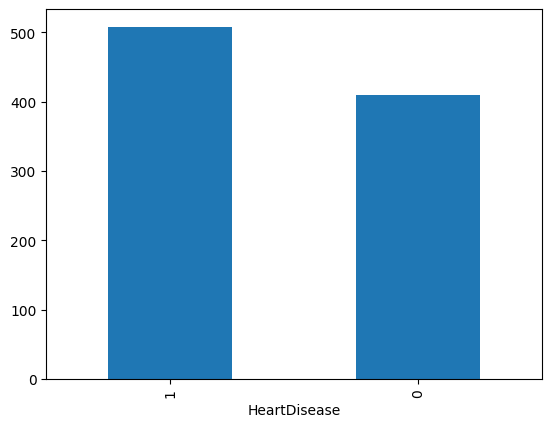

In [135]:
df["HeartDisease"].value_counts().plot(kind='bar')
plt.show()

In [136]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

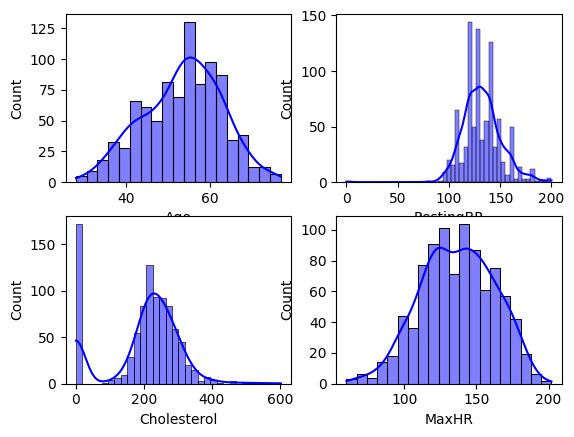

In [137]:
def plotting( var , num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],color='blue',kde=True)
    
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout

In [138]:
df["RestingBP"].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64

In [139]:
df["Cholesterol"].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [140]:
#clean data

In [141]:
ch_mean=df.loc[df["Cholesterol"]!=0,"Cholesterol"].mean()
df["Cholesterol"]=df["Cholesterol"].replace(0,ch_mean)
df["Cholesterol"]=df["Cholesterol"].round(2)

In [142]:
ch_mean

np.float64(244.6353887399464)

In [143]:
df["Cholesterol"].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [144]:
Resting_mean=df.loc[df["RestingBP"]!=0,"RestingBP"].mean()

df["RestingBP"]=df["RestingBP"].replace(0,Resting_mean)

df["RestingBP"]=df["RestingBP"].round(2)

In [145]:
df["RestingBP"].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64

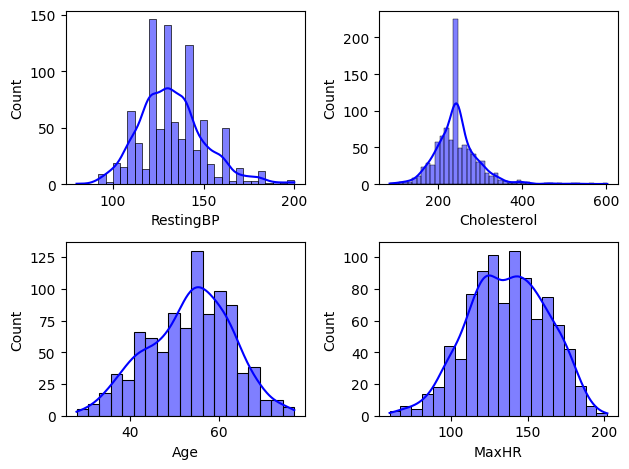

In [146]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],color='blue',kde=True)

plotting('RestingBP',1)
plotting('Cholesterol',2)
plotting('Age',3)
plotting('MaxHR',4)
plt.tight_layout()
plt.show()

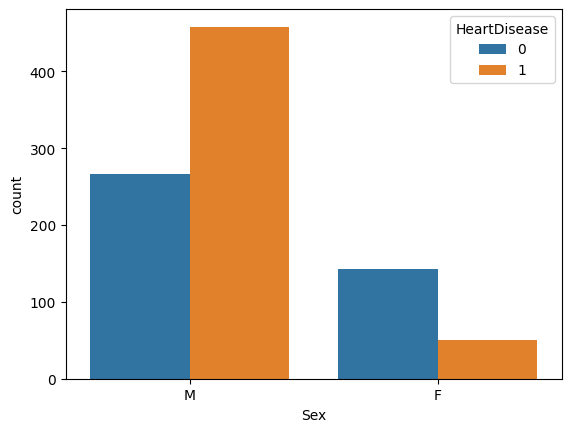

In [147]:
sns.countplot(x='Sex',data=df, hue='HeartDisease')
plt.show()

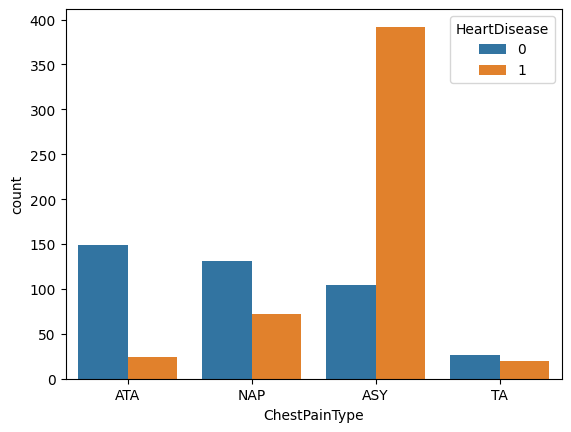

In [148]:
sns.countplot(x="ChestPainType",data=df, hue="HeartDisease")
plt.show()

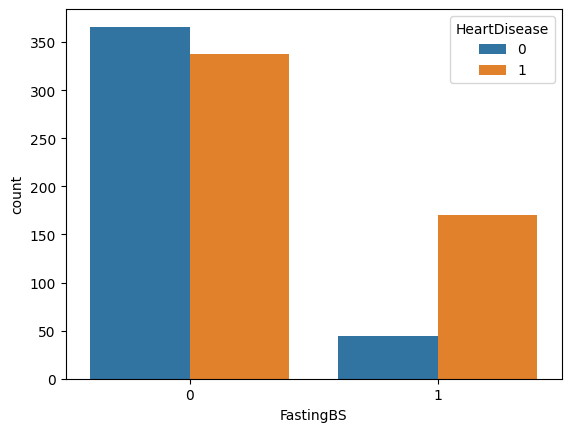

In [149]:
sns.countplot(x="FastingBS",data=df, hue="HeartDisease")
plt.show()

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

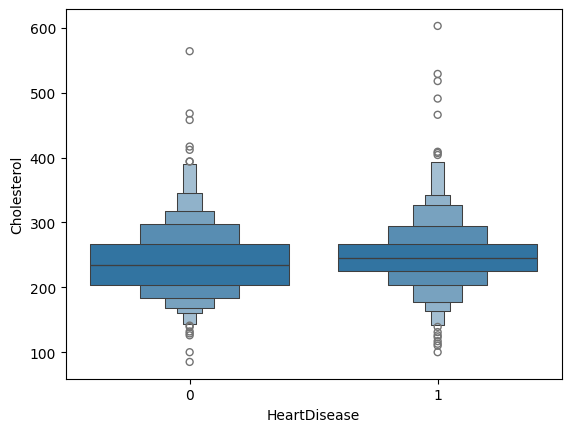

In [150]:
sns.boxenplot(x='HeartDisease',y='Cholesterol',data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

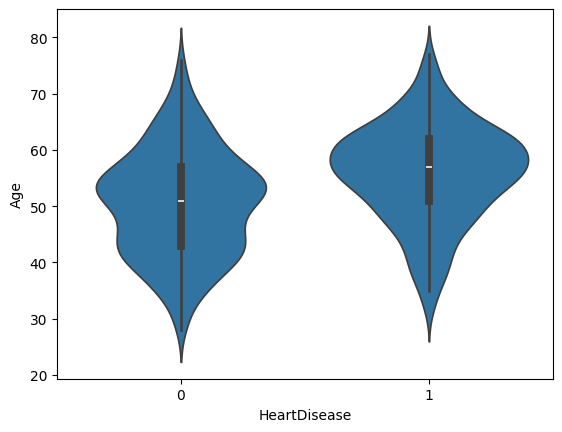

In [151]:
sns.violinplot(x='HeartDisease',y='Age',data=df)

<Axes: >

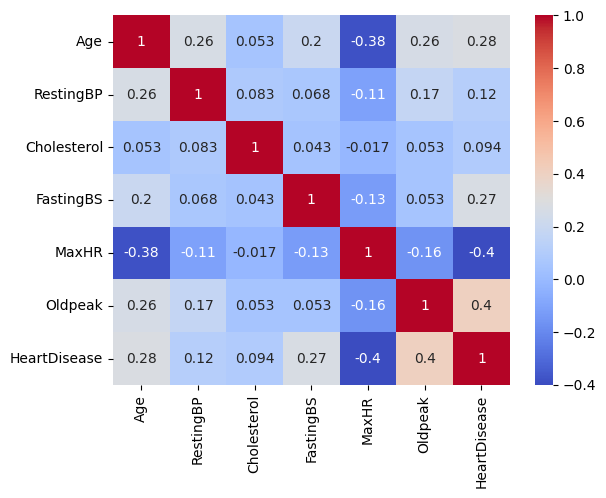

In [152]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [153]:
#data preprocessing  and cleaning 

In [154]:
df_encode=pd.get_dummies(df,drop_first=True)

In [155]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [156]:
df_encode=df_encode.astype(int)

In [157]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [158]:
numerical_cols=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler=StandardScaler()
df_encode[numerical_cols]=scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [159]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [161]:
X=df_encode.drop('HeartDisease',axis=1)
y=df_encode['HeartDisease']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [163]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,-1.220994,-0.697453,-0.084751,1,2.247488,-0.727592,1,0,1,0,1,0,0,0,0
25,-1.857431,-0.141284,-0.666478,0,1.618717,-0.727592,1,0,1,0,1,0,0,0,1
84,0.264027,0.971054,-0.591417,1,-0.464087,0.282891,1,0,0,0,1,0,1,1,0
10,-1.751359,-0.141284,-0.628948,0,0.203982,-0.727592,0,0,1,0,1,0,0,0,1
344,-0.266338,-0.697453,-0.009689,1,-1.289349,-0.727592,1,0,0,0,1,0,0,1,0


In [164]:
scalers=StandardScaler()
X_train_scaled=scalers.fit_transform(X_train)
X_test_scaled=scalers.transform(X_test)

In [165]:
X_train_scaled

array([[-1.24506731, -0.74576034, -0.10359418, ..., -0.83846064,
        -1.03325003, -0.84792072],
       [-1.8862362 , -0.1826618 , -0.71808371, ..., -0.83846064,
        -1.03325003,  1.17935554],
       [ 0.25099346,  0.94353528, -0.63879474, ...,  1.19266183,
         0.96781995, -0.84792072],
       ...,
       [ 0.67843939, -0.1826618 ,  0.15409499, ...,  1.19266183,
        -1.03325003,  1.17935554],
       [ 0.67843939,  1.05615499, -0.0243052 , ...,  1.19266183,
        -1.03325003,  1.17935554],
       [-1.45879027,  0.94353528,  2.90938678, ..., -0.83846064,
         0.96781995, -0.84792072]], shape=(734, 15))

In [166]:
models={
    'Logistic Regression':LogisticRegression(),
    
    'SVM':SVC(),
    'Naive Bayes':GaussianNB(),
    'DecisionTree':DecisionTreeClassifier(),
    'KNeighbors':KNeighborsClassifier()
}

In [167]:
result=[]

In [168]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)

    y_pred=model.predict(X_test_scaled)

    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    result.append({
     'Model':name,
     'Accuracy': round(acc,4),
     'F1-Score': round(f1,4)
    })
    

In [169]:
result

[{'Model': 'Logistic Regression', 'Accuracy': 0.8696, 'F1-Score': 0.8846},
 {'Model': 'SVM', 'Accuracy': 0.8478, 'F1-Score': 0.8667},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8478, 'F1-Score': 0.8614},
 {'Model': 'DecisionTree', 'Accuracy': 0.7772, 'F1-Score': 0.794},
 {'Model': 'KNeighbors', 'Accuracy': 0.8641, 'F1-Score': 0.8815}]

In [172]:
import joblib
joblib.dump(scalers,'scaler.pkl')
joblib.dump(models['Logistic Regression'],'model.pkl')
joblib.dump(X.columns.tolist,'columns.pkl')

['columns.pkl']